In [119]:
import pandas as pd
import lasio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyts.metrics import dtw

las = lasio.read('./data/00-01-01-073-05W5-0.LAS') # true
df_las = las.df()
df_core = pd.read_csv('./data/CORE_DATA.csv') # approximated

df_las["DEPTH"] = df_las.index
df_core.index = df_core.DEPTH
print(df_las.head())
print(df_core.head())

DPHI   PHIN      GR     CALI    ILD   DEPTH
DEPT                                                
390.00  0.199  0.457  82.478  238.379  2.923  390.00
390.25  0.208  0.456  86.413  238.331  2.925  390.25
390.50  0.246  0.452  90.229  238.069  2.917  390.50
390.75  0.266  0.475  90.944  238.752  2.898  390.75
391.00  0.287  0.484  88.866  239.724  2.890  391.00
         DEPTH   PHIN  BARREL
DEPTH                        
365.00  365.00  0.457       1
365.25  365.25  0.456       1
365.50  365.50  0.452       1
365.75  365.75  0.475       1
366.00  366.00  0.484       1


# TODOS

* df_core["DEPTH"] should shifted to df_las["DEPT"] and maximized the R square (optimization function) ["PHIN"] for both
* Can't overlap with other barrels
* Don't move over 10ft (moving window) - optional


In [93]:
def df_plot_data(df_core, df_las):
    fig = plt.figure(figsize=(10,14))
    ax1 = fig.add_subplot(111)
    plt.style.use(['dark_background'])
    plt.title('Corepor Shift')
    groups = df_core.groupby("BARREL")
    for name, group in groups:
        ax1.plot(group["PHIN"], group["DEPTH"],label='Predicted',marker="o")
    # ax1.plot( df_core["PHIN"], df_core["DEPTH"],'red',label='Predicted',marker="o")
    ax1.plot( df_las["PHIN"], df_las["DEPTH"],'blue', alpha=0.7,label='original')
    plt.ylim(400,650)
    plt.xlim(0,1)
    plt.tight_layout()
    ax1.legend()
    plt.gca().invert_yaxis()
    plt.show()


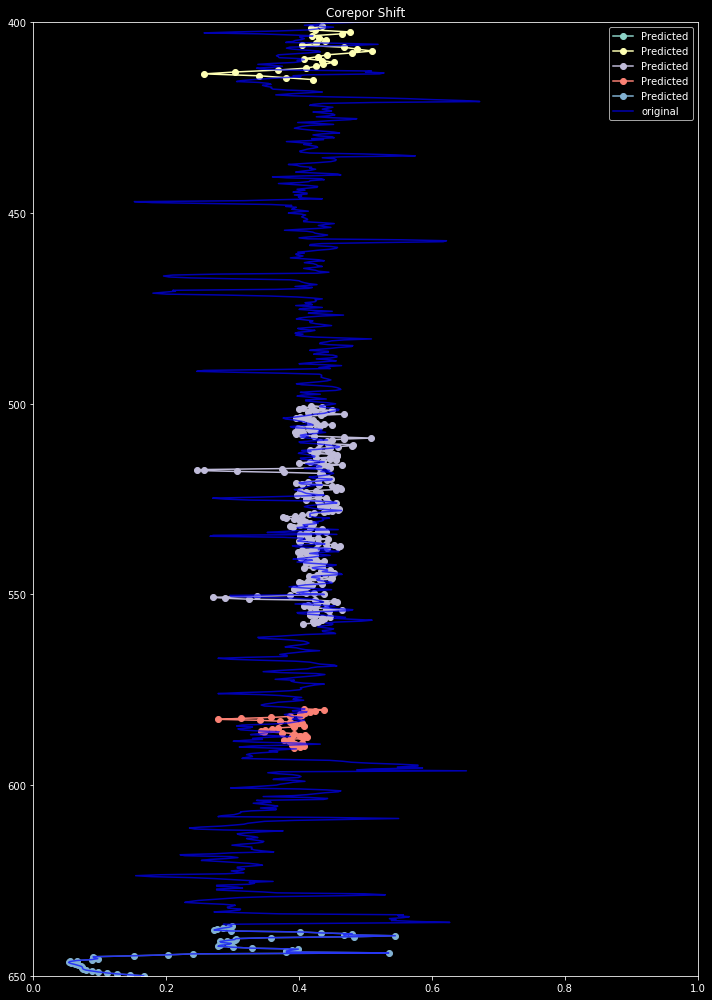

In [94]:
df_plot_data(df_core, df_las)

# Approaching the problem

## Method 1: BF
* remove NAN data
* separate into multiple blocks based on the speration (controlled by the Barrel #)
* 

In [124]:
dtw(df_core.PHIN.tolist(),df_las.PHIN.tolist(),options={"window_size":10},method="classic")

1.210476352515818

In [174]:
df_core2 = df_core.copy()
df_core2["DEPTH"] = df_core.DEPTH - 1.210476352515818


In [175]:
df_las2 = df_las[abs(df_las["DEPTH"] - df_core2["DEPTH"]) <= 1.210476352515818]

In [176]:
print(df_las2)

DPHI   PHIN      GR     CALI     ILD   DEPTH
DEPT                                                 
401.00  0.252  0.435  68.414  234.264   3.707  401.00
401.50  0.260  0.436  68.475  233.854   3.950  401.50
402.00  0.255  0.411  61.780  237.163   4.964  402.00
402.50  0.191  0.304  51.237  239.233   5.997  402.50
403.00  0.078  0.340  45.474  241.102   6.132  403.00
...       ...    ...     ...      ...     ...     ...
649.00  0.007  0.098  41.662  264.141  16.559  649.00
649.25  0.017  0.111  46.210  264.697  15.834  649.25
649.50  0.023  0.126  51.129  265.467  14.449  649.50
649.75  0.028  0.146  58.340  266.024  12.236  649.75
650.00  0.036  0.166  64.622  266.581  10.576  650.00

[354 rows x 6 columns]


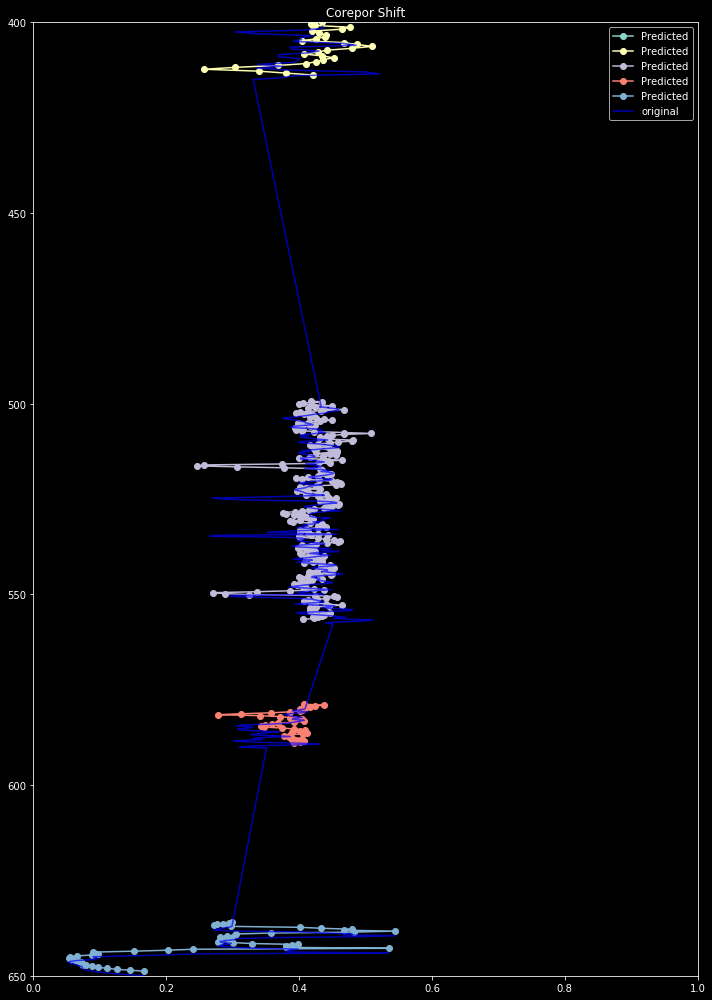

In [177]:
df_plot_data(df_core2, df_las2)